In [8]:
import tushare as ts
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb

start = "2023 1 1"
end   = "2024 1 26"
# # 赛轮轮胎 vs 上证指数
ticker1  = '601058'
ticker2  = "000001"

#Get stock data
stock1 = ts.get_hist_data(ticker1)
stock2 = ts.get_hist_data(ticker2)

stock1_daily_returns = stock1['close'].pct_change()
stock2_daily_returns = stock2['close'].pct_change()

print(stock1)


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
             open   high  close    low     volume  price_change  p_change  \
date                                                                        
2024-01-29  11.25  11.53  11.32  11.19  394419.97          0.09      0.80   
2024-01-26  11.26  11.39  11.23  11.06  373213.06         -0.10     -0.88   
2024-01-25  11.45  11.49  11.33  10.99  513800.00         -0.27     -2.33   
2024-01-24  11.55  11.60  11.60  11.44  255367.33          0.07      0.61   
2024-01-23  11.22  11.59  11.53  11.14  296462.75          0.31      2.76   
...           ...    ...    ...    ...        ...           ...       ...   
2021-08-06   9.24   9.29   9.18   9.11  108390.63         -0.05     -0.54   
2021-08-05   9.30   9.36   9.23   9.10  171792.05         -0.14     -1.49   
2021-08-04   9.37   9.48   9.37   9.35  158264.12          0.01      0.11   
2021-08-03   9.40   9.59   9.36   9.25  239638.

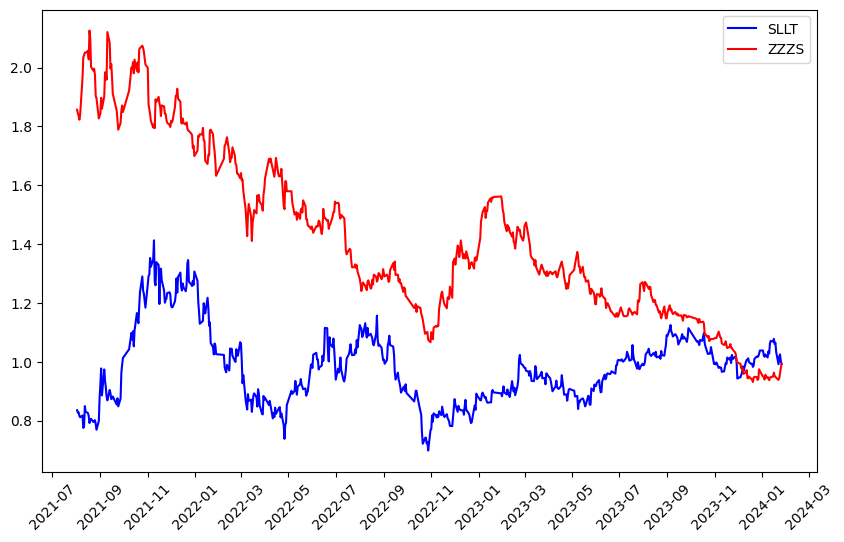

In [15]:
plt.figure(figsize=(10, 6)) # plt.figure(figsize=(width, height))

from matplotlib.dates import MonthLocator, DateFormatter, date2num
# 设置 x 轴刻度显示频率为每个月一次
# bymonth是一年一次 在x月标记
locator = MonthLocator(interval=2)
plt.xticks(rotation=45)  # 你可以设置需要的角度
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# 不用date2num就会导致plot内部无法识别 变成1970年开始
# 回报率+1 是为了累加 这里计算的就是从起始日期开始的每月的叠加回报率 (1 + 0.05) * (1 - 0.04) ... 
# cumulative product 是累乘 
plt.plot(date2num(stock1.index), (stock1_daily_returns + 1).cumprod(), label='SLLT', color='blue')
plt.plot(date2num(stock2.index), (stock2_daily_returns + 1).cumprod(), label='ZZZS', color='red')


plt.xticks(rotation=45)
plt.legend()
plt.show()
